In [7]:
import json
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
from scipy.special import rel_entr

In [8]:
al = set(range(0, 24))
lt = set(range(24, 63))
at = set(range(63, 89))
ca = set(range(89, 127))
ct = set(range(127, 147))

clusters = [lt, at, al, ca, ct]
cluster_str = ['lt', 'at', 'al', 'ca', 'ct']
image_id_to_cluster_id = {}
image_id_to_cluster_str = {}
for cluster_id, cluster in enumerate(clusters):
    for image_id in cluster:
        image_id_to_cluster_id[image_id] = cluster_id
        image_id_to_cluster_str[image_id] = cluster_str[cluster_id]

In [9]:
string_answer_to_code = {
    'All are Same Species': [1, 1, 1],
    'ONLY 1 and 2 are Same Species': [1, 1, 0],
    'ONLY 2 and 3 are Same Species': [0, 1, 1],
    'ONLY 1 and 3 are Same Species': [1, 0, 1],
    'NONE, all are different species': [0, 1, 2]
}

In [10]:
# exp_name = 'at-lt-at'

In [11]:
# with open(f'data/{exp_name}.json') as file:
#     data = json.load(file)

In [12]:
print(exp_name)
count = pd.DataFrame(confusion_matrix).fillna(0)
pd.DataFrame(confusion_matrix).fillna(0)

NameError: name 'exp_name' is not defined

In [ ]:
emp_obs_prob_mat = pd.DataFrame(confusion_matrix).fillna(0) / pd.DataFrame(confusion_matrix).fillna(0).sum(axis=0)
emp_obs_prob_mat

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(1, 0, 1)",0.402,0.509,0.192,0.113,0.062
"(1, 1, 0)",0.139,0.134,0.157,0.443,0.556
"(0, 1, 1)",0.127,0.132,0.424,0.112,0.086
"(1, 1, 1)",0.292,0.163,0.152,0.048,0.030
"(0, 1, 2)",0.040,0.062,0.075,0.284,0.266


In [ ]:
print(emp_obs_prob_mat.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.4f}".format,
))  

\begin{tabular}{lrrrrr}
\toprule
{} &  at, lt, at &  lt, at, lt &  lt, at, ct &  lt, at, al &  lt, at, ca \\
\midrule
(1, 0, 1) &      0.4020 &      0.5090 &      0.1920 &      0.1130 &      0.0620 \\
(1, 1, 0) &      0.1390 &      0.1340 &      0.1570 &      0.4430 &      0.5560 \\
(0, 1, 1) &      0.1270 &      0.1320 &      0.4240 &      0.1120 &      0.0860 \\
(1, 1, 1) &      0.2920 &      0.1630 &      0.1520 &      0.0480 &      0.0300 \\
(0, 1, 2) &      0.0400 &      0.0620 &      0.0750 &      0.2840 &      0.2660 \\
\bottomrule
\end{tabular}



/var/folders/36/1dhnptp91hzb49wm7_3_1b6m0000gn/T/ipykernel_10785/3078085336.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(emp_obs_prob_mat.to_latex(index=True,


In [ ]:
emp_obs_mat = pd.DataFrame(confusion_matrix).fillna(0)
column_sums = emp_obs_mat.sum(axis=0)
column_sums

at, lt, at    1000
lt, at, lt    1000
lt, at, ct    1000
lt, at, al    1000
lt, at, ca    1000
dtype: int64

In [ ]:
emp_var = emp_obs_prob_mat * (1 - emp_obs_prob_mat) * column_sums / (column_sums - 1)
two_sd = 2 * np.sqrt(emp_var / column_sums)

In [ ]:
two_sd
print(two_sd.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.4f}".format,
))  

\begin{tabular}{lrrrrr}
\toprule
{} &  at, lt, at &  lt, at, lt &  lt, at, ct &  lt, at, al &  lt, at, ca \\
\midrule
(1, 0, 1) &      0.0310 &      0.0316 &      0.0249 &      0.0200 &      0.0153 \\
(1, 1, 0) &      0.0219 &      0.0216 &      0.0230 &      0.0314 &      0.0314 \\
(0, 1, 1) &      0.0211 &      0.0214 &      0.0313 &      0.0200 &      0.0177 \\
(1, 1, 1) &      0.0288 &      0.0234 &      0.0227 &      0.0135 &      0.0108 \\
(0, 1, 2) &      0.0124 &      0.0153 &      0.0167 &      0.0285 &      0.0280 \\
\bottomrule
\end{tabular}



/var/folders/36/1dhnptp91hzb49wm7_3_1b6m0000gn/T/ipykernel_10785/2495288626.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(two_sd.to_latex(index=True,


In [ ]:
print(f'Experiment: {exp_name}')

Experiment: lt-at-ca


In [ ]:
count.sort_index(ascending=True)

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(0, 1, 1)",127,132,424,112,86
"(0, 1, 2)",40,62,75,284,266
"(1, 0, 1)",402,509,192,113,62
"(1, 1, 0)",139,134,157,443,556
"(1, 1, 1)",292,163,152,48,30


In [ ]:
emp_obs_prob_mat

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(1, 0, 1)",0.402,0.509,0.192,0.113,0.062
"(1, 1, 0)",0.139,0.134,0.157,0.443,0.556
"(0, 1, 1)",0.127,0.132,0.424,0.112,0.086
"(1, 1, 1)",0.292,0.163,0.152,0.048,0.030
"(0, 1, 2)",0.040,0.062,0.075,0.284,0.266


In [ ]:
two_sd / 2

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(1, 0, 1)",0.031025,0.031633,0.024923,0.020033,0.015260
"(1, 1, 0)",0.021891,0.021556,0.023020,0.031432,0.031440
"(0, 1, 1)",0.021070,0.021419,0.031271,0.019956,0.017741
"(1, 1, 1)",0.028771,0.023372,0.022718,0.013527,0.010794
"(0, 1, 2)",0.012400,0.015260,0.016667,0.028534,0.027960


In [ ]:
emp_obs_prob_mat

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(1, 0, 1)",0.402,0.509,0.192,0.113,0.062
"(1, 1, 0)",0.139,0.134,0.157,0.443,0.556
"(0, 1, 1)",0.127,0.132,0.424,0.112,0.086
"(1, 1, 1)",0.292,0.163,0.152,0.048,0.030
"(0, 1, 2)",0.040,0.062,0.075,0.284,0.266


In [ ]:
from scipy.stats import multinomial
from scipy.stats import kstest
from scipy.stats import chisquare

In [ ]:
np.random.seed(42)
n = 1000
for exp_i, exp_j in combinations(emp_obs_prob_mat.columns, 2):
    result = kstest(rvs=multinomial(n=1, p=emp_obs_prob_mat[exp_i]).rvs(n).argmax(axis=1),
                    cdf=multinomial(n=1, p=emp_obs_prob_mat[exp_j]).rvs(n).argmax(axis=1))
    print(f'{exp_i} vs. {exp_j}: statistic: {result.statistic:.3f} p-value: {result.pvalue:.3f} corrected: {result.pvalue * 10:.3f}')

at, lt, at vs. lt, at, lt: statistic: 0.114 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, ct: statistic: 0.209 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, al: statistic: 0.302 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, ca: statistic: 0.347 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, ct: statistic: 0.305 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, al: statistic: 0.431 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, ca: statistic: 0.461 p-value: 0.000 corrected: 0.000
lt, at, ct vs. lt, at, al: statistic: 0.214 p-value: 0.000 corrected: 0.000
lt, at, ct vs. lt, at, ca: statistic: 0.275 p-value: 0.000 corrected: 0.000
lt, at, al vs. lt, at, ca: statistic: 0.090 p-value: 0.001 corrected: 0.006


In [ ]:
np.random.seed(42)
for exp_i, exp_j in combinations(emp_obs_mat.columns, 2):
    result = chisquare(emp_obs_mat[exp_i], emp_obs_mat[exp_j])
    print(f'{exp_i} vs. {exp_j}: statistic: {result.statistic:.3f} p-value: {result.pvalue:.3f} corrected: {result.pvalue * 10:.3f}')

at, lt, at vs. lt, at, lt: statistic: 132.768 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, ct: statistic: 585.072 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, al: statistic: 2399.714 p-value: 0.000 corrected: 0.000
at, lt, at vs. lt, at, ca: statistic: 4676.961 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, ct: statistic: 730.893 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, al: statistic: 2055.912 p-value: 0.000 corrected: 0.000
lt, at, lt vs. lt, at, ca: statistic: 4313.710 p-value: 0.000 corrected: 0.000
lt, at, ct vs. lt, at, al: statistic: 1488.154 p-value: 0.000 corrected: 0.000
lt, at, ct vs. lt, at, ca: statistic: 2520.612 p-value: 0.000 corrected: 0.000
lt, at, al vs. lt, at, ca: statistic: 84.796 p-value: 0.000 corrected: 0.000


In [ ]:
np.sqrt((n + n) / (n * n)) * 1.358

0.060731606268894296

In [ ]:
emp_obs_prob_mat

,"at, lt, at","lt, at, lt","lt, at, ct","lt, at, al","lt, at, ca"
"(1, 0, 1)",0.402,0.509,0.192,0.113,0.062
"(1, 1, 0)",0.139,0.134,0.157,0.443,0.556
"(0, 1, 1)",0.127,0.132,0.424,0.112,0.086
"(1, 1, 1)",0.292,0.163,0.152,0.048,0.030
"(0, 1, 2)",0.040,0.062,0.075,0.284,0.266


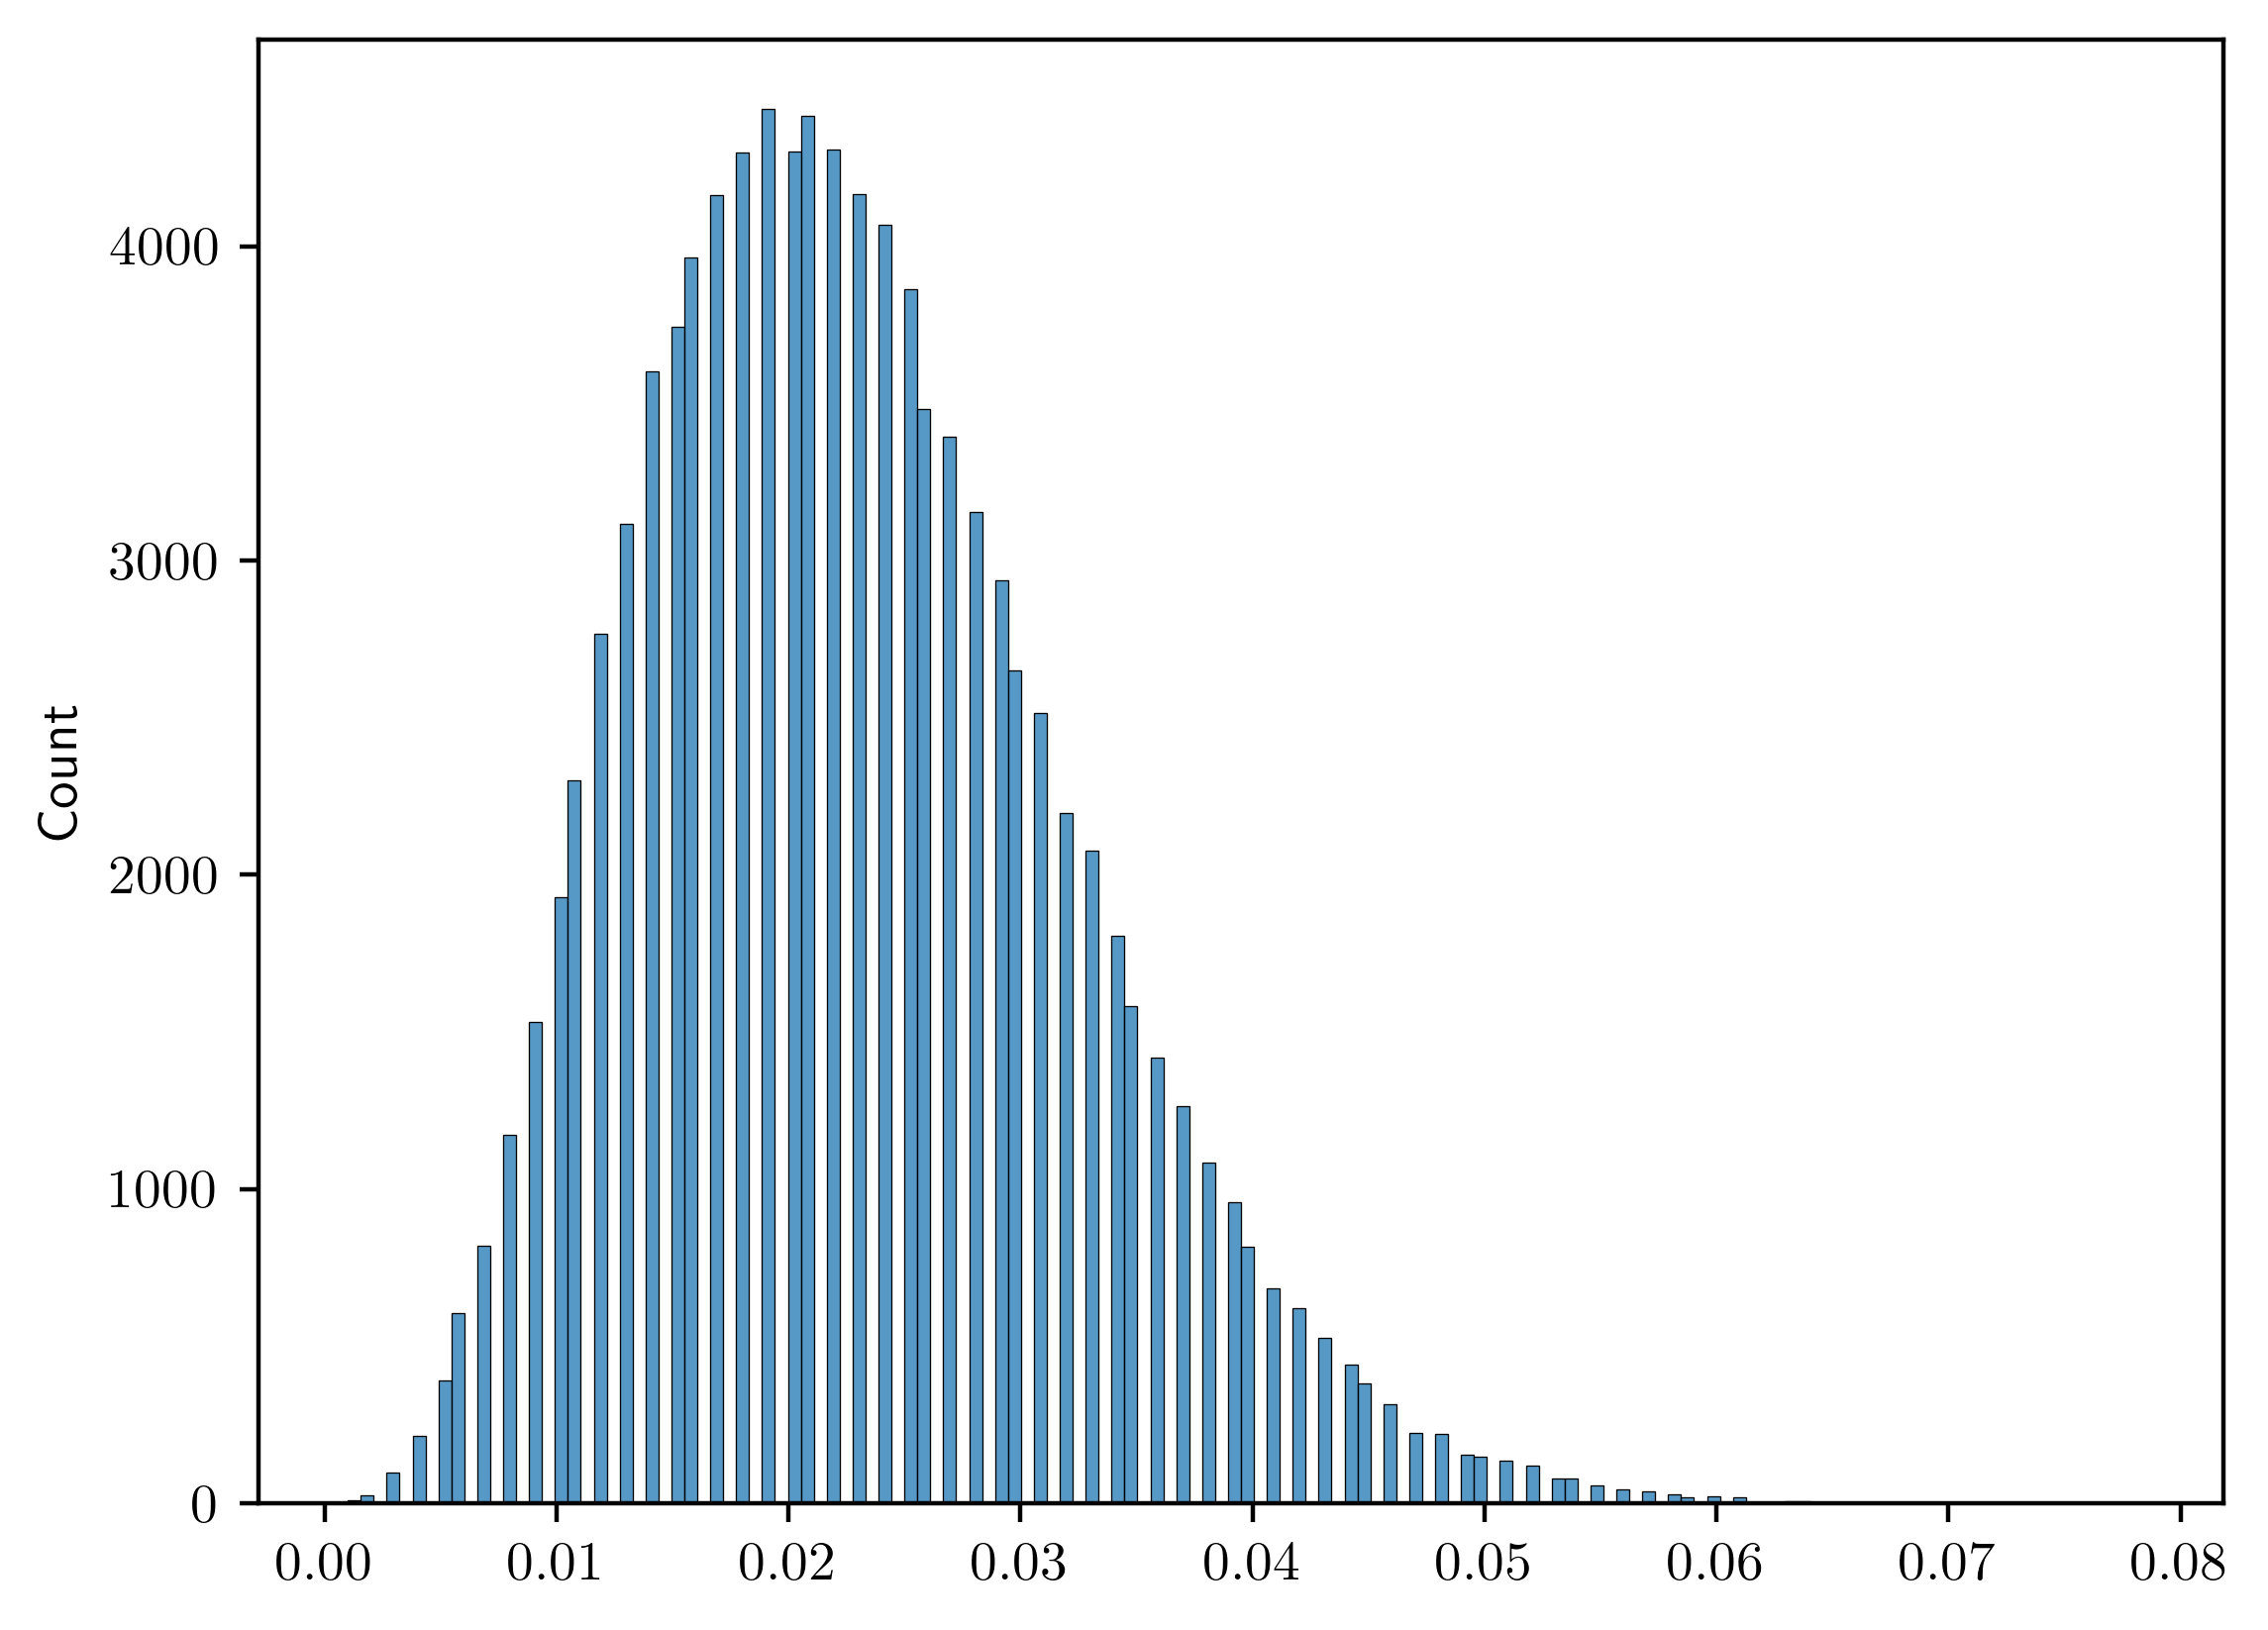

In [ ]:
for col_a, col_b in combinations(emp_obs_prob_mat.columns, 2):
    r_1 = get_d_95(emp_obs_prob_mat[col_a].to_numpy())
    break
    r_2 = get_d_95(emp_obs_prob_mat[col_b].to_numpy())
    r_3 = 0.5 * np.linalg.norm(emp_obs_prob_mat[col_a] - emp_obs_prob_mat[col_b], 1)
    print(f'{col_a} {r_1:.5f}, {col_b} {r_2:.5f}, {r_1 + r_2:.3f}, {r_3:.3f}, {r_3 > r_1 + r_2}')

In [ ]:
mat = emp_obs_prob_mat.to_numpy()

In [ ]:
mat

array([[0.402, 0.509, 0.192, 0.113, 0.062],
       [0.139, 0.134, 0.157, 0.443, 0.556],
       [0.127, 0.132, 0.424, 0.112, 0.086],
       [0.292, 0.163, 0.152, 0.048, 0.03 ],
       [0.04 , 0.062, 0.075, 0.284, 0.266]])